In [1]:
!pip install scikit-plot

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler

/var/folders/v6/l44twy1n0qvfc768h9g9j3s40000gn/T/ipykernel_32195/1848384613.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [3]:
import numpy as np
import pandas as pd

dataset = 'card_transdata.csv'
df = pd.read_csv(dataset)

print(df.head)

<bound method NDFrame.head of         distance_from_home  distance_from_last_transaction  \
0                57.877857                        0.311140   
1                10.829943                        0.175592   
2                 5.091079                        0.805153   
3                 2.247564                        5.600044   
4                44.190936                        0.566486   
...                    ...                             ...   
999995            2.207101                        0.112651   
999996           19.872726                        2.683904   
999997            2.914857                        1.472687   
999998            4.258729                        0.242023   
999999           58.108125                        0.318110   

        ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                             1.945940              1.0        1.0   
1                             1.294219              1.0        0.0   
2              

## Checking Dataset Bias

In [4]:
df['fraud'] = df['fraud'].astype(int)
count_fraud = df['fraud'].value_counts()[1]
count_nofraud = df['fraud'].value_counts()[0]

print(f"Number of Fraud Records: {count_fraud}")
print(f"Number of Legit Records: {count_nofraud}")

Number of Fraud Records: 87403
Number of Legit Records: 912597


## Random Undersampling of Legit and fraud transactions to eliminate bias

In [5]:
df_fraud = df[df['fraud']==1]
df_legit = df[df['fraud']==0]

fraudsize= 12000
fraud_sampl = df_fraud.sample(n= fraudsize, random_state = 42)

legitsize = 12000
legit_sampl = df_legit.sample(n= legitsize, random_state =42)

#concat to same dataset
random_sampl = pd.concat([fraud_sampl, legit_sampl])
# shuffling the dataset
random_sampl = random_sampl.sample(frac =1, random_state = 42).reset_index(drop=True)
print(random_sampl)


       distance_from_home  distance_from_last_transaction  \
0               21.045531                        6.341773   
1               16.347560                        2.441970   
2               55.595822                        0.068172   
3                2.749042                        0.946270   
4               91.112089                        5.778971   
...                   ...                             ...   
23995           10.195887                        4.477089   
23996          103.149928                        0.101785   
23997           30.151727                        0.832781   
23998           14.931530                        0.436477   
23999           19.484143                        5.139240   

       ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                            9.404974              1.0        0.0   
1                            2.397058              1.0        1.0   
2                            0.040522              1.0      

### Removing Null values

In [6]:
null_values = random_sampl.isna().sum()
print("Total Null Values:", null_values)

Total Null Values: distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64


### Removing Duplicates

In [7]:
total_duplicates = random_sampl.duplicated().sum()
print("Total Duplicates:", total_duplicates)

Total Duplicates: 0


In [8]:
random_sampl.drop_duplicates(inplace=True)
print(random_sampl)

       distance_from_home  distance_from_last_transaction  \
0               21.045531                        6.341773   
1               16.347560                        2.441970   
2               55.595822                        0.068172   
3                2.749042                        0.946270   
4               91.112089                        5.778971   
...                   ...                             ...   
23995           10.195887                        4.477089   
23996          103.149928                        0.101785   
23997           30.151727                        0.832781   
23998           14.931530                        0.436477   
23999           19.484143                        5.139240   

       ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                            9.404974              1.0        0.0   
1                            2.397058              1.0        1.0   
2                            0.040522              1.0      

In [9]:
random_sampl.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.00000
mean,44.366653,8.677824,3.745881,0.883458,0.309417,0.057375,0.783083,0.50000
std,94.948530,39.928813,4.854602,0.320880,0.462263,0.232563,0.412154,0.50001
min,0.034267,0.000676,0.016867,0.000000,0.000000,0.000000,0.000000,0.00000
25%,4.175212,0.310800,0.701825,1.000000,0.000000,0.000000,1.000000,0.00000
50%,12.012783,1.048797,2.063166,1.000000,0.000000,0.000000,1.000000,0.50000
75%,38.229561,3.811614,5.256077,1.000000,1.000000,0.000000,1.000000,1.00000
max,2311.481607,1872.446884,126.294930,1.000000,1.000000,1.000000,1.000000,1.00000


In [10]:
#Splitting fraud and legit transactions
X = random_sampl.drop(["fraud"], axis=1)
Y = random_sampl["fraud"]

In [11]:
# Splitting into test and train datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=3)

In [12]:
import pandas as pd
from scipy.stats import zscore
from sklearn.model_selection import train_test_split


# Identify and handle outliers
X_no_outliers = X[(np.abs(zscore(X)) <= 3).all(axis=1)].reset_index(drop=True)
Y_no_outliers = Y[X_no_outliers.index]


X_train, X_test, Y_train, Y_test = train_test_split(X_no_outliers, Y_no_outliers, test_size=0.3, random_state=3)


## Standard Scaling

In [13]:
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_fscore_support


## Decision Tree Model Training

In [15]:
decTree_model = DecisionTreeClassifier(random_state=1,min_samples_leaf=10, max_depth=4,criterion="entropy")

# Train the model on the training data
decTree_model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = decTree_model.predict(X_test)

## Decision Tree Model Evaluation

In [16]:
accuracy = accuracy_score(Y_test, Y_pred)
classification_report_result = classification_report(Y_test, Y_pred)
confusion_matrix_result = confusion_matrix(Y_test, Y_pred)

print("\nClassification Report:")
print(classification_report_result)
print("\nConfusion Matrix:")
print(confusion_matrix_result)

precision, recall, f1_score, _ = precision_recall_fscore_support(Y_test, Y_pred, average='weighted')


print(f"\nAccuracy: {accuracy}")
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)


Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.94      0.65      3206
           1       0.52      0.06      0.11      3270

    accuracy                           0.50      6476
   macro avg       0.51      0.50      0.38      6476
weighted avg       0.51      0.50      0.38      6476


Confusion Matrix:
[[3020  186]
 [3072  198]]

Accuracy: 0.496911673872761
Precision: 0.5057768510236492
Recall: 0.496911673872761
F1 Score: 0.3763138444588672


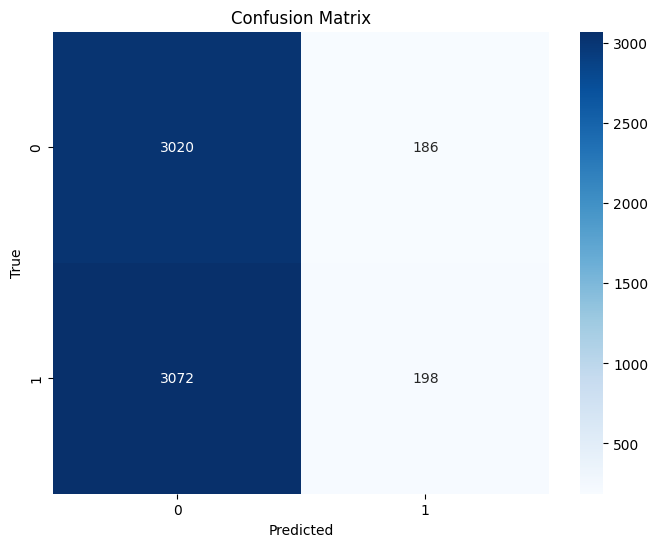

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Decision Tree Model Cross-Validation

In [18]:
from sklearn.model_selection import cross_validate, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

k_folds = 10


kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

scoring_metrics = ['accuracy', 'precision', 'recall', 'f1']

cv_results = cross_validate(decTree_model, X, Y, cv=kf, scoring=scoring_metrics, return_train_score=False)

for metric in scoring_metrics:
    print(f'{metric.capitalize()}: {np.mean(cv_results[f"test_{metric}"])}')

Accuracy: 0.9935
Precision: 0.994570174727024
Recall: 0.9924259531145339
F1: 0.9934954766321995


In [19]:
import tensorflow as tf

## Neural Network Architecture Definition

In [20]:
NN_model = tf.keras.Sequential()
NN_model.add(tf.keras.layers.Dense(6, input_dim=X_train.shape[1], activation='relu'))
NN_model.add(tf.keras.layers.Dense(4, activation='relu'))
NN_model.add(tf.keras.layers.Dense(2, activation='relu'))
NN_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))


# Compile the model with binary cross-entropy loss
NN_model.compile(loss='binary_crossentropy', optimizer='adam')

2024-02-11 21:06:49.514807: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-02-11 21:06:49.514831: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-02-11 21:06:49.514836: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-02-11 21:06:49.514866: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-02-11 21:06:49.514882: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [39]:

history = NN_model.fit(X_train, Y_train, epochs=20, batch_size=64,validation_split=.2)

Epoch 1/20
189/189 [==============================] - 1s 6ms/step - loss: 0.6949 - val_loss: 0.6951
Epoch 2/20
189/189 [==============================] - 1s 6ms/step - loss: 0.6945 - val_loss: 0.6949
Epoch 3/20
189/189 [==============================] - 1s 6ms/step - loss: 0.6955 - val_loss: 0.6928
Epoch 4/20
189/189 [==============================] - 1s 6ms/step - loss: 0.6947 - val_loss: 0.6950
Epoch 5/20
189/189 [==============================] - 1s 6ms/step - loss: 0.6942 - val_loss: 0.6937
Epoch 6/20
189/189 [==============================] - 1s 6ms/step - loss: 0.6946 - val_loss: 0.6927
Epoch 7/20
189/189 [==============================] - 1s 6ms/step - loss: 0.6944 - val_loss: 0.6931
Epoch 8/20
189/189 [==============================] - 1s 6ms/step - loss: 0.6967 - val_loss: 0.6927
Epoch 9/20
189/189 [==============================] - 1s 6ms/step - loss: 0.6940 - val_loss: 0.7025
Epoch 10/20
189/189 [==============================] - 1s 6ms/step - loss: 0.6950 - val_loss: 0.6929

In [40]:
val_predictions = NN_model.predict(X_test)

203/203 [==============================] - 0s 2ms/step


In [41]:
val_predictions

array([[0.5187789 ],
       [0.47476834],
       [0.49251747],
       ...,
       [0.48994493],
       [0.4847675 ],
       [0.4503557 ]], dtype=float32)

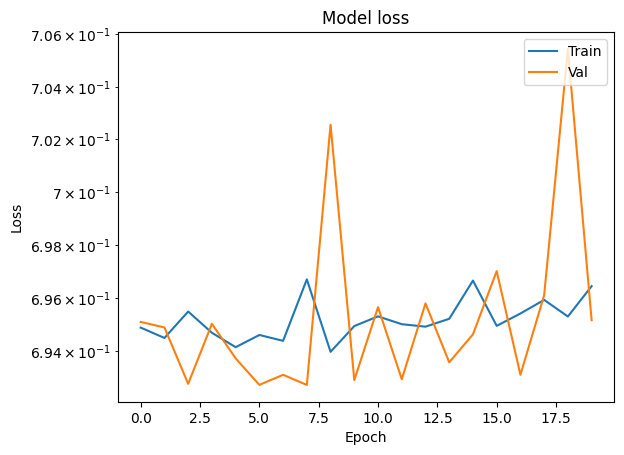

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.yscale('log')
plt.show()

In [43]:
preds = np.around(val_predictions)

In [44]:
print(classification_report(Y_test, preds))

              precision    recall  f1-score   support

           0       0.51      0.52      0.51      3206
           1       0.52      0.51      0.51      3270

    accuracy                           0.51      6476
   macro avg       0.51      0.51      0.51      6476
weighted avg       0.51      0.51      0.51      6476



## Gradient Boosting Model

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

gb_model = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=3, random_state=42)

## Gradient Boosting Model Training and Evaluation¶


In [27]:
gb_model.fit(X_train, Y_train)

pred = gb_model.predict(X_test)

print("Classification Report:\n", classification_report(Y_test, pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, pred))

# Extract precision, recall, and F1-score from the classification report
precision, recall, f1_score, _ = precision_recall_fscore_support(Y_test, pred, average='weighted')

# Print precision, recall, and F1-score
print(f"\nAccuracy: {accuracy}")
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.61      0.55      3206
           1       0.52      0.41      0.46      3270

    accuracy                           0.51      6476
   macro avg       0.51      0.51      0.51      6476
weighted avg       0.51      0.51      0.51      6476

Confusion Matrix:
 [[1955 1251]
 [1915 1355]]

Accuracy: 0.496911673872761
Precision: 0.5126340178902742
Recall: 0.5111179740580605
F1 Score: 0.5064335760369434


## Gradient Boosting Model Cross Validation¶


In [28]:
# Perform cross-validation and get scores for each metric
cv_results = cross_validate(gb_model, X, Y, cv=kf, scoring=scoring_metrics, return_train_score=False)

for metric in scoring_metrics:
    print(f'{metric.capitalize()}: {np.mean(cv_results[f"test_{metric}"])}')

Accuracy: 0.9945416666666667
Precision: 0.9907296692230119
Recall: 0.9984188583568654
F1: 0.9945582993657215


## Support Vector Machine

In [29]:
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [30]:
# Initialize the SVM classifier
svm_model = SVC(random_state=42)

# Train the model
svm_model.fit(X_train, Y_train)


SVC(random_state=42)

In [31]:
# Predict the labels of the test set
y_pred = svm_model.predict(X_test)


In [32]:
# Print the confusion matrix
print(confusion_matrix(Y_test, y_pred))

# Print the classification report
print(classification_report(Y_test, y_pred))


[[1361 1845]
 [1319 1951]]
              precision    recall  f1-score   support

           0       0.51      0.42      0.46      3206
           1       0.51      0.60      0.55      3270

    accuracy                           0.51      6476
   macro avg       0.51      0.51      0.51      6476
weighted avg       0.51      0.51      0.51      6476



In [33]:
k_folds = 10


kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

scoring_metrics = ['accuracy', 'precision', 'recall', 'f1']

cv_results = cross_validate(svm_model, X, Y, cv=kf, scoring=scoring_metrics, return_train_score=False)

for metric in scoring_metrics:
    print(f'{metric.capitalize()}: {np.mean(cv_results[f"test_{metric}"])}')

Accuracy: 0.9424999999999999
Precision: 0.8979499606967416
Recall: 0.998409912349735
F1: 0.945508953338871


## K Nearest Neighbours

In [34]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the model with k=5
knnmodel = KNeighborsClassifier(n_neighbors=5)

# Fit the model
knnmodel.fit(X_train, Y_train)


KNeighborsClassifier()

In [35]:
# Make predictions
y_pred = knnmodel.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred)
classification_report_result = classification_report(Y_test, y_pred)
confusion_matrix_result = confusion_matrix(Y_test, y_pred)

# Print the results
print("\nClassification Report:")
print(classification_report_result)
print("\nConfusion Matrix:")
print(confusion_matrix_result)

# Extract precision, recall, and F1-score from the classification report
precision, recall, f1_score, _ = precision_recall_fscore_support(Y_test, y_pred, average='weighted')

# Print precision, recall, and F1-score
print(f"\nAccuracy: {accuracy}")
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)


Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50      3206
           1       0.51      0.50      0.50      3270

    accuracy                           0.50      6476
   macro avg       0.50      0.50      0.50      6476
weighted avg       0.50      0.50      0.50      6476


Confusion Matrix:
[[1612 1594]
 [1643 1627]]

Accuracy: 0.5001544163063619
Precision: 0.5002292066610173
Recall: 0.5001544163063619
F1 Score: 0.5001631764625258


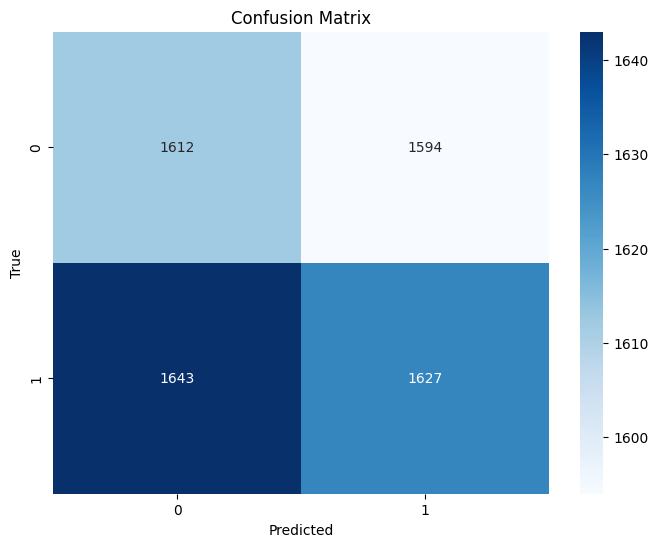

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [37]:
cv_results = cross_validate(knnmodel, X, Y, cv=kf, scoring=scoring_metrics, return_train_score=False)

for metric in scoring_metrics:
    print(f'{metric.capitalize()}: {np.mean(cv_results[f"test_{metric}"])}')

Accuracy: 0.9488749999999999
Precision: 0.9112363400723236
Recall: 0.9945757693259623
F1: 0.9510712077054974
